In [438]:
import torch
# choosing gpu as computational device if gpu is available
# since we are working with small data this step is not necessary indeed
# but i own the repo and do whatever i want... just joking doing it for fun im really stressed out


# MPS: Metal Performance Shaders --> for Mac devices with M chips
# CUDA: For device with cuda support
# CPU: General case

if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")
    
generator = torch.Generator(device=device)
seed = 20040324
generator.manual_seed(seed)

import pandas as pd

# # Read the CSV file
# df = pd.read_csv('/Users/ezelbayraktar/Documents/DL-NLP/MyLanguageModelJourney/OPTED-Dictionary.csv')

# # Get the first column
# first_column = df.iloc[:, 0]

# # Convert the first column to text
# first_column_text = "\n".join(first_column.astype(str))

# print(first_column_text)

read_file = open('/Users/ezelbayraktar/Documents/DL-NLP/MyLanguageModelJourney/names.txt', 'r')
words = read_file.read().splitlines()
read_file.close()

In [439]:
#getting chars 
chars = sorted(list(set(''.join(words))))
chars

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [440]:
## implementing a dictionary to enum chars
ctoi={}
ctoi['.'] = 0
i = 1
for char in chars:
    # i do not check if char is in ctoi since chars is already a set so no dupes
    # so it is not possible that char is added to ctos twice
    ctoi[char] = i
    i+=1
ctoi['.']

0

In [441]:
## implementing a dictionary to char nums

## just flipping ctoi since itoc is just the same but with keys and values exchanged
itoc = {value: key for key, value in ctoi.items()}
itoc[0]

'.'

In [442]:
## building ...
import torch
gram = 3
X,Y = [],[]
for w in words:
    #print(w)
    grams = [0]*gram
    for ch in w+'.':
        cai = ctoi[ch] ## cai stands for character as integer
        X.append(grams)
        Y.append(cai)
        #print(itoc[grams[0]],itoc[grams[1]],itoc[grams[2]]," >> ",itoc[cai])
        ##print(ch,cai)
        grams = grams[1:] + [cai]

X = torch.tensor(X,device=device)
Y = torch.tensor(Y,device=device)

In [443]:
data_size = X.shape[0]
data_random_indices = torch.randperm(data_size)
data_random_indices

tensor([ 82789, 110908, 209409,  ...,  55688,  14733,  72665])

In [444]:
train_size = 0.8
#train_indices_of_rows = torch.randint(0, data_size ,data_size * train_size, generator=generator)
train_indices_of_rows = data_random_indices[:int(train_size*data_size)]
X_train = X[train_indices_of_rows]
Y_train = Y[train_indices_of_rows]

In [445]:
validation_size = 0.1
#validation_indices_of_rows = torch.randint(0, data_size ,data_size * validation_size, generator=generator)
validation_indices_of_rows = data_random_indices[int(train_size*data_size):int((validation_size+train_size)*data_size)]
X_valid = X[validation_indices_of_rows]
Y_valid = Y[validation_indices_of_rows]

In [446]:
evaluation_size = 0.1
#evalutation_indices_of_rows = torch.randint(0, data_size ,data_size * evaluation_size, generator=generator)
evalutation_indices_of_rows = data_random_indices[int((validation_size+train_size)*data_size):]
X_eval = X[evalutation_indices_of_rows]
Y_eval = Y[evalutation_indices_of_rows]

In [447]:

# Print shapes
print("Shapes:")
print(f"X_train: {X_train.shape}")
print(f"Y_train: {Y_train.shape}")
print(f"X_valid: {X_valid.shape}")
print(f"Y_valid: {Y_valid.shape}")
print(f"X_eval: {X_eval.shape}")
print(f"Y_eval: {Y_eval.shape}")



Shapes:
X_train: torch.Size([182516, 3])
Y_train: torch.Size([182516])
X_valid: torch.Size([22815, 3])
Y_valid: torch.Size([22815])
X_eval: torch.Size([22815, 3])
Y_eval: torch.Size([22815])


In [448]:
# X_train = X_train.to(device)
# Y_train = Y_train.to(device)
# X_valid = X_valid.to(device)
# Y_valid = Y_valid.to(device)
# X_eval = X_eval.to(device)
# Y_eval = Y_eval.to(device)


rows = 27 #  english chars + the dot
dimension = 10 # dimensions for each char
dimensions = torch.randn(rows, dimension, generator=generator, device=device)
dimensions = torch.randn((27, 10), generator=generator, device=device, requires_grad=True)

dimensions
# params are the dimension values our model assigns to characters

tensor([[-0.8441,  0.4442,  0.7368,  0.7954, -0.5493,  0.2943, -0.1826, -1.3402,
          1.2121,  0.3059],
        [ 0.3878, -1.1010,  1.8189,  0.4719, -0.2023, -1.8422,  0.5779,  1.0814,
          1.2433,  0.4114],
        [-0.7053, -0.3688, -0.8450, -0.0475, -0.9467,  1.3064, -0.6005, -0.4381,
          0.7840,  0.3449],
        [ 0.1305, -0.9211,  1.0137, -0.3206, -1.0797, -1.0420,  0.7330,  0.0224,
         -0.6115,  2.0619],
        [ 0.2378, -1.1784, -1.8409, -1.0786, -0.2863, -0.9967,  0.3653,  0.0674,
         -0.6903, -1.4424],
        [-0.2955,  0.1750, -1.3892,  0.9093, -0.8116, -1.4969,  1.0157,  1.1712,
          2.3478, -0.9131],
        [-1.3849, -0.8881, -1.2339,  0.1638,  2.2019, -1.1133, -2.1620,  0.2332,
          0.5493, -2.0426],
        [-0.2015,  1.1151, -0.3645,  2.1503,  0.9801, -0.8833, -1.1786, -2.2045,
          2.1848,  0.8490],
        [-0.6684, -0.4144, -2.1090,  0.8225,  1.5607, -0.2541, -0.4118, -0.9687,
         -3.6585,  0.2116],
        [-0.3794,  

In [449]:
dimensions[X].shape

torch.Size([228146, 3, 10])

In [450]:
# here we still have the gram table actually but each character in each gram is repsrented with dimenstional params
#->> dimensions[X]
embedded = dimensions[X] 
embedded

tensor([[[-0.8441,  0.4442,  0.7368,  ..., -1.3402,  1.2121,  0.3059],
         [-0.8441,  0.4442,  0.7368,  ..., -1.3402,  1.2121,  0.3059],
         [-0.8441,  0.4442,  0.7368,  ..., -1.3402,  1.2121,  0.3059]],

        [[-0.8441,  0.4442,  0.7368,  ..., -1.3402,  1.2121,  0.3059],
         [-0.8441,  0.4442,  0.7368,  ..., -1.3402,  1.2121,  0.3059],
         [-0.2955,  0.1750, -1.3892,  ...,  1.1712,  2.3478, -0.9131]],

        [[-0.8441,  0.4442,  0.7368,  ..., -1.3402,  1.2121,  0.3059],
         [-0.2955,  0.1750, -1.3892,  ...,  1.1712,  2.3478, -0.9131],
         [ 0.1682,  0.9504,  0.0173,  ..., -0.3346, -1.4071,  0.2976]],

        ...,

        [[ 0.0287, -0.8999, -1.8260,  ..., -0.9048, -1.5102,  1.2622],
         [ 0.0287, -0.8999, -1.8260,  ..., -0.9048, -1.5102,  1.2622],
         [ 0.2917,  0.0040,  0.9855,  ..., -1.0812,  1.5191, -0.7838]],

        [[ 0.0287, -0.8999, -1.8260,  ..., -0.9048, -1.5102,  1.2622],
         [ 0.2917,  0.0040,  0.9855,  ..., -1.0812,  1.

In [451]:
## abandoned class...

import torch
class layer():
    def __init__(self, input_size, output_size):
        self.weights = torch.randn(input_size, output_size, requires_grad=True, generator=generator, device=device)
        self.bias = torch.randn(output_size, requires_grad=True, generator=generator, device=device)
        
    def __call__(self, x):
        return torch.tanh(x @ self.weights + self.bias)
    
    def parameters(self):
        return [self.weights, self.bias]
    
    def zero_grad(self):
        self.weights.grad = None
        self.bias.grad = None





In [452]:
inputNumberLayer1 = (embedded.shape)[2]*(embedded.shape)[1] # input nummber is equal to (grams count) * (dimensions)
neuronsLayer1 = 200 # matter of choice CAUTION: too much neurons may cause overfitting
print(inputNumberLayer1)
W1 = torch.randn(inputNumberLayer1, neuronsLayer1, generator=generator, device=device)
b1 = torch.randn(neuronsLayer1, generator=generator, device=device)

W2 = torch.randn(neuronsLayer1, 27, generator=generator, device=device)
b2 = torch.randn(27, generator=generator, device=device)

# W3 = torch.randn(100, 27, generator=generator, device=device)
# b3 = torch.randn(27, generator=generator, device=device)

# W4 = torch.randn(140, 90, generator=generator, device=device)
# b4 = torch.randn(90, generator=generator, device=device)

# layer1 = layer(30, 200)
# layer2 = layer(200, 27)
# layers = [layer1, layer2]

30


Iteration 0: 2.0537850856781006
Iteration 1500: 2.064054250717163
Iteration 3000: 2.0814571380615234
Iteration 4500: 2.072052240371704
Iteration 6000: 2.0651257038116455
Iteration 7500: 2.0621023178100586
Iteration 9000: 2.0584542751312256


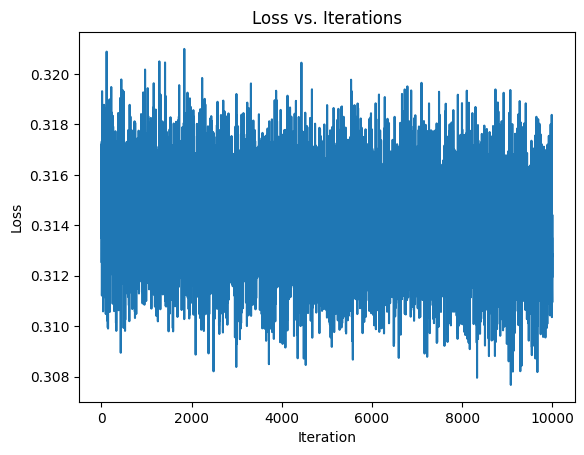

In [469]:
import time
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F

loss_values = []
iterations = []
dimensions = dimensions.to(device)

parameters = [W1, b1, W2, b2]
for parameter in parameters:
    parameter.requires_grad = True
optimizer = torch.optim.Adam(parameters, lr=0.1)

batch_size = 20000


# Training loop
for iter in range(10000):


    batch_indexes = torch.randint(0, X_train.shape[0], (batch_size,)).to(device)
    embedded = dimensions[X_train[batch_indexes]]
    embedded = embedded.view(embedded.shape[0], embedded.shape[1] * embedded.shape[2])
 
    activation1 = torch.tanh(embedded @ W1 + b1)
    # activation2 = torch.tanh(activation1 @ W2 + b2)
    # activation3 = torch.tanh(activation2 @ W3 + b3)

    out = activation1 @ W2 + b2

    logits = out
    targets = Y_train[batch_indexes].to(device)
    loss = F.cross_entropy(logits, targets)
    
    # Store loss value and iteration number
    loss_values.append(loss.log10().item())
    iterations.append(iter)
    
    if iter % 1500 == 0:
        print(f'Iteration {iter}: {loss.item()}')
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # forward pass
    lr = 0.1 if i < 9000 else 0.01
    for parameter in parameters:
        parameter.data += -lr * parameter.grad

# Plot loss graph
plt.plot(iterations, loss_values)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations')
plt.show()


In [476]:

embedded = dimensions[X_eval] 
embedded = embedded.view(embedded.shape[0] , embedded.shape[1]*embedded.shape[2])
activation1 = torch.tanh(embedded @ W1 + b1)
out = activation1 @ W2 + b2
logits = out
targets = Y_eval.to(device)
loss = F.cross_entropy(logits, targets)
loss

tensor(2.1374, device='mps:0', grad_fn=<NllLossBackward0>)

In [472]:

# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)
for _ in range(20):
    out = []
    context = [0] * gram # initialize with all ...
    while True:
      emb = dimensions[torch.tensor([context],device=device)] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1).to('cpu')
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itoc[i] for i in out))

carmahela.
jhleigh.
mili.
taty.
skaan.
kena.
hut.
farelynn.
kaeli.
ner.
kia.
chaiiy.
kaleigh.
ham.
joce.
quinton.
lilea.
jadiq.
waler.
gianrix.
